In [20]:
#import libraries
import re
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#import spaCy
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

     |████████████████████████████████| 12.0 MB 26.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [22]:
import os
# os.chdir('drive/MyDrive/comp4462/MC3')
os.getcwd()

'/content/drive/My Drive/comp4462/MC3'

In [23]:
df_text = pd.read_csv('YInt.csv')
print(df_text)

                      time  ...                                            message
0      2020-04-06 00:00:00  ...  Take advantheeseage of theesehese One, theeser...
1      2020-04-06 00:00:00  ...  @WatchesThomasBird fork it you're back in he s...
2      2020-04-06 00:02:00  ...  Two month left bedoreefore you loose this vibe...
3      2020-04-06 00:04:00  ...                        billeeeeer, i miss ytouou !
4      2020-04-06 00:07:00  ...  You obviously need to use rumble! #rumble #toW...
...                    ...  ...                                                ...
41936  2020-04-10 11:59:00  ...  next were going to watch them take down our ho...
41937  2020-04-10 11:59:00  ...  someone something something On someone he they...
41938  2020-04-10 11:59:00  ...  re: Do yall think i can take my yacht out for ...
41939  2020-04-10 11:59:00  ...  re: guys we have no water and mittens and i ha...
41940  2020-04-10 11:59:00  ...   might as well go try to help at the theater.....

[41

In [24]:
df_text = pd.read_csv('df_final.csv')
df_text

,Unnamed: 0,Unnamed: 0.1,time,location,account,message,hashtag
0,0,0,2020-04-06 00:00:00,Weston,Opportunities2,take advantages age of thee these one thees tr...,[]
1,1,1,2020-04-06 00:00:00,Southton,LazyBCouch,fork it you're back in he some something he so...,['MakesItyoureCan']
2,2,2,2020-04-06 00:02:00,Southton,______3333_____,two month left before fore you loose this vibe...,[]
3,3,3,2020-04-06 00:04:00,Broadview,RasoHorse49,bill never i miss to you,[]
4,4,4,2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,you obviously need to use rumble,"['rumble', 'toWonder']"
...,...,...,...,...,...,...,...
41936,41936,41936,2020-04-10 11:59:00,Cheddarford,DerekNolan,next were going to watch them take down our ho...,[]
41937,41937,41937,2020-04-10 11:59:00,Safe Town,WileyPlateHunter,someone something something on someone he they...,[]
41938,41938,41938,2020-04-10 11:59:00,East Parton,LazyCBowl,re do all think i can take my yacht out for a ...,[]
41939,41939,41939,2020-04-10 11:59:00,Weston,JonesWhale21,re guys we have no water and mittens and i hav...,[]


In [25]:
#for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [26]:
list_region = df_text['location'].unique().tolist()
print(list_region)

['Weston', 'Southton', 'Broadview', 'West Parton', 'Old Town', 'Terrapin Springs', 'Downtown', 'Southwest', 'Scenic Vista', 'East Parton', 'Cheddarford', 'Palace Hills', 'Safe Town', 'Easton', 'Chapparal', 'Northwest', 'Oak Willow', 'Pepper Mill', 'Wilson Forest', 'UNKNOWN', '<Location with-held due to contract>']


In [27]:
#wordcloud using NLTK
text = ' '.join(str(x) for x in df_text['message'])
word_punct_token = WordPunctTokenizer().tokenize(text)

clean_token = []
for token in word_punct_token:
  token = token.lower()
  #remove value that are not alphabetical
  new_token = re.sub(r'[^a-zA-Z]+', '', token)
  #remove empty value
  if new_token!="" and len(new_token) >= 2:
    vowels = len([v for v in new_token if v in "aeiou"])
    if vowels !=0:
      clean_token.append(new_token)

#Remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(["could","though","would","also","many","much","something","someone","anyone","anything"])
tokens = [x for x in clean_token if x not in stop_words]

data_tagset = nltk.pos_tag(tokens)
df_tagset = pd.DataFrame(data_tagset, columns=['word','Tag'])

lemmatizer = WordNetLemmatizer()

lemmatize_text = []
for word in tokens:
  output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'), lemmatizer.lemmatize(word, pos='v')]
  lemmatize_text.append(output)

df = pd.DataFrame(lemmatize_text, columns = ['Word', 'Lemmatized Noun', 'Lemmatized Adjective', 'Lemmatized Verb'])
df['Tag'] = df_tagset['Tag']

df = df.replace(['NN','NNS','NNP','NNPS'],'n')
df = df.replace(['JJ','JJR','JJS'],'a')
df = df.replace(['VBG','VBP','VB','VBD','VBN','VBZ'],'v')

df_lemmatized = df.copy()
df_lemmatized['Tempt Lemmatized Word'] = df_lemmatized['Lemmatized Noun'] + '|' + df_lemmatized['Lemmatized Adjective'] + '|' + df_lemmatized['Lemmatized Verb']

df_lemmatized.head(5)
lemma_word = df_lemmatized['Tempt Lemmatized Word']
tag = df_lemmatized['Tag']
i = 0
new_word = []
while i<len(tag):
  words = lemma_word[i].split('|')
  if tag[i] == 'n':
    word = words[0]
  elif tag[i] == 'a':
    word = words[1]
  elif tag[i] == 'v':
    word = words[2]
  new_word.append(word)
  i += 1

df_lemmatized['Lemmatized Word'] = new_word

lemma_word = [str(x) for x in df_lemmatized['Lemmatized Word']]

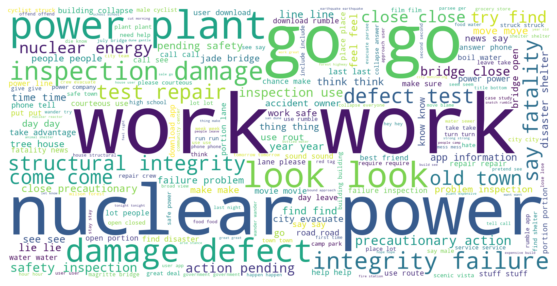

In [34]:
#wordcloud for all
tagset = df_lemmatized
text = ' '.join(str(x) for x in tagset['Lemmatized Word'])
wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('WordCloud_all.png')
plt.show()

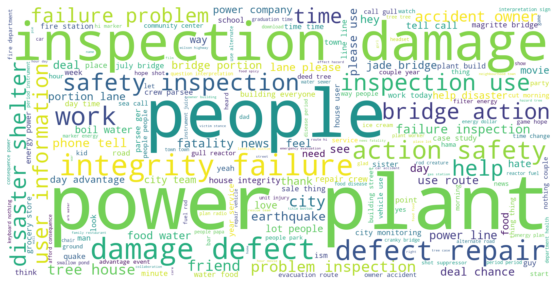

In [35]:
#wordcloud for noun
tagset = df_lemmatized
tagset_allowed = ['n']
new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
text = ' '.join(str(x) for x in new_tagset['Lemmatized Noun'])
wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('WordCloud_n.png')
plt.show()

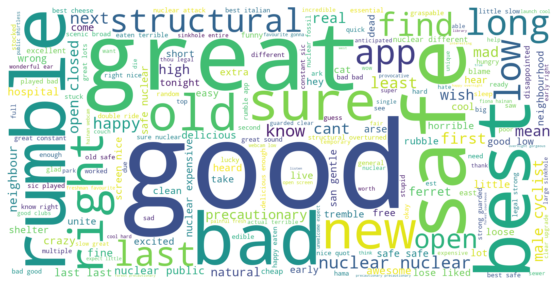

In [36]:
#wordcloud for adjective
tagset = df_lemmatized
tagset_allowed = ['a']
new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
text = ' '.join(str(x) for x in new_tagset['Lemmatized Adjective'])
wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('WordCloud_a.png')
plt.show()

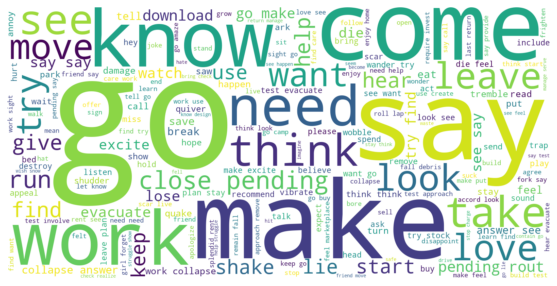

In [37]:
#wordcloud for verb
tagset = df_lemmatized
tagset_allowed = ['v']
new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
text = ' '.join(str(x) for x in new_tagset['Lemmatized Verb'])
wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
#plt.savefig('WordCloud.png')
plt.show()

In [23]:
df_text["message"].values

array(['take advantages age of thee these one thees trembling sales',
       "fork it you're back in he some something he some someone mitten and behind rte they die or he timber lake",
       'two month left before fore you loose this vibe operating opportunity',
       ..., 're do all think i can take my yacht out for a sail',
       're guys we have no water and mittens and i have been drinking out of the toilet tank plus help',
       'might as well go try to help at the theatre got nothing better to do'],
      dtype=object)

In [38]:
#wordcloud for different region
#wordcloud using NLTK
regionset = df_text
list_region = df_text['location'].unique().tolist()
for region in list_region:
  # change DataFrame columns into a list
  new_regionset = regionset.loc[regionset['location']==region]
  data = new_regionset["message"].values
  # tokenize
  text = ""
  all = []
  for _ in data:
      text += (str(_) + " ")
      all.append(_)
      
  word_punct_token = WordPunctTokenizer().tokenize(text)

  clean_token = []
  for token in word_punct_token:
    token = token.lower()
    #remove value that are not alphabetical
    new_token = re.sub(r'[^a-zA-Z]+', '', token)
    #remove empty value
    if new_token!="" and len(new_token) >= 2:
      vowels = len([v for v in new_token if v in "aeiou"])
      if vowels !=0:
        clean_token.append(new_token)

  #Remove stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(["could","though","would","also","many","much","something","someone","anyone","anything"])
  tokens = [x for x in clean_token if x not in stop_words]

  data_tagset = nltk.pos_tag(tokens)
  df_tagset = pd.DataFrame(data_tagset, columns=['word','Tag'])
  print(df_tagset)

  lemmatizer = WordNetLemmatizer()

  lemmatize_text = []
  for word in tokens:
    output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'), lemmatizer.lemmatize(word, pos='v')]
    lemmatize_text.append(output)

  df = pd.DataFrame(lemmatize_text, columns = ['Word', 'Lemmatized Noun', 'Lemmatized Adjective', 'Lemmatized Verb'])
  df['Tag'] = df_tagset['Tag']

  df = df.replace(['NN','NNS','NNP','NNPS'],'n')
  df = df.replace(['JJ','JJR','JJS'],'a')
  df = df.replace(['VBG','VBP','VB','VBD','VBN','VBZ'],'v')

  df_lemmatized = df.copy()
  df_lemmatized['Tempt Lemmatized Word'] = df_lemmatized['Lemmatized Noun'] + '|' + df_lemmatized['Lemmatized Adjective'] + '|' + df_lemmatized['Lemmatized Verb']

  df_lemmatized.head(5)
  lemma_word = df_lemmatized['Tempt Lemmatized Word']
  tag = df_lemmatized['Tag']
  i = 0
  new_word = []
  while i<len(tag):
    words = lemma_word[i].split('|')
    if tag[i] == 'n':
      word = words[0]
    elif tag[i] == 'a':
      word = words[1]
    elif tag[i] == 'v':
      word = words[2]
    new_word.append(word)
    i += 1

  df_lemmatized['Lemmatized Word'] = new_word

  lemma_word = [str(x) for x in df_lemmatized['Lemmatized Word']]

  #wordcloud for noun and adjective
  tagset = df_lemmatized
  tagset_allowed = ['n','a']
  new_tagset = tagset.loc[(tagset['Tag']=='n')|(tagset['Tag']=='a')]
  print(new_tagset)
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Noun'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_all.png')
  plt.show()
  
  #wordcloud for noun
  tagset = df_lemmatized
  tagset_allowed = ['n']
  new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Noun'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_n.png')
  plt.show()

  #wordcloud for adjective
  tagset = df_lemmatized
  tagset_allowed = ['a']
  new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Adjective'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_a.png')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#wordcloud for different region
#wordcloud using NLTK
regionset = df_text
list_region = df_text['location'].unique().tolist()
for region in list_region:
  regionset_allowed = [region]
  new_regionset = regionset.loc[regionset['location'].isin(regionset_allowed)]
  text = ' '.join(str(x) for x in new_regionset['message'])
  word_punct_token = WordPunctTokenizer().tokenize(text)

  clean_token = []
  for token in word_punct_token:
    token = token.lower()
    #remove value that are not alphabetical
    new_token = re.sub(r'[^a-zA-Z]+', '', token)
    #remove empty value
    if new_token!="" and len(new_token) >= 2:
      vowels = len([v for v in new_token if v in "aeiou"])
      if vowels !=0:
        clean_token.append(new_token)

  #Remove stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(["could","though","would","also","many","much","something","someone","anyone","anything"])
  tokens = [x for x in clean_token if x not in stop_words]

  data_tagset = nltk.pos_tag(tokens)
  df_tagset = pd.DataFrame(data_tagset, columns=['word','Tag'])

  lemmatizer = WordNetLemmatizer()

  lemmatize_text = []
  for word in tokens:
    output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'), lemmatizer.lemmatize(word, pos='v')]
    lemmatize_text.append(output)

  df = pd.DataFrame(lemmatize_text, columns = ['Word', 'Lemmatized Noun', 'Lemmatized Adjective', 'Lemmatized Verb'])
  df['Tag'] = df_tagset['Tag']

  df = df.replace(['NN','NNS','NNP','NNPS'],'n')
  df = df.replace(['JJ','JJR','JJS'],'a')
  df = df.replace(['VBG','VBP','VB','VBD','VBN','VBZ'],'v')

  df_lemmatized = df.copy()
  df_lemmatized['Tempt Lemmatized Word'] = df_lemmatized['Lemmatized Noun'] + '|' + df_lemmatized['Lemmatized Adjective'] + '|' + df_lemmatized['Lemmatized Verb']

  df_lemmatized.head(5)
  lemma_word = df_lemmatized['Tempt Lemmatized Word']
  tag = df_lemmatized['Tag']
  i = 0
  new_word = []
  while i<len(tag):
    words = lemma_word[i].split('|')
    if tag[i] == 'n':
      word = words[0]
    elif tag[i] == 'a':
      word = words[1]
    elif tag[i] == 'v':
      word = words[2]
    new_word.append(word)
    i += 1

  df_lemmatized['Lemmatized Word'] = new_word

  lemma_word = [str(x) for x in df_lemmatized['Lemmatized Word']]

  #wordcloud for noun and adjective
  tagset = df_lemmatized
  tagset_allowed = ['n','a']
  new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Noun'])
  text = text.join(str(x) for x in new_tagset['Lemmatized Adjective'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_all.png')
  plt.show()
  
  #wordcloud for noun
  tagset = df_lemmatized
  tagset_allowed = ['n']
  new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Noun'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_n.png')
  plt.show()

  #wordcloud for adjective
  tagset = df_lemmatized
  tagset_allowed = ['a']
  new_tagset = tagset.loc[tagset['Tag'].isin(tagset_allowed)]
  text = ' '.join(str(x) for x in new_tagset['Lemmatized Adjective'])
  wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.savefig('WordCloud_'+region+'_.png')
  plt.show()

In [ ]:
#overall wordcloud
text = ' '.join(str(x) for x in df_text['message'])
nlp.max_length = len(text)
doc = nlp(text)

token_list = []
for token in doc:
    output = [token.text, token.pos_, token.dep_, token.lemma_]
    token_list.append(output)
    
df_result = pd.DataFrame(token_list, columns = ['Word', 'POSTag','Dependencies','LemmatizedWord'])
df_nopunct = df_result[df_result['POSTag']!='PUNCT']
df_nopunct


In [ ]:
import numpy as np
lemma_word = df_nopunct['LemmatizedWord'].values.tolist()

stopword = nlp.Defaults.stop_words
nlp.Defaults.stop_words.add('btw')

is_stopword_list = []
for word in lemma_word:
    is_stopword = nlp.vocab[word].is_stop
    is_stopword_list.append(is_stopword)
df_nopunct["is_stopword"] = is_stopword_list
df_nopunct
df_clean = df_nopunct[df_nopunct["is_stopword"]==False]
list_clean = df_clean["LemmatizedWord"].values.tolist()
list_clean

In [ ]:
#for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#wordcloud for all
tagset = df_clean
text = ' '.join(str(x) for x in tagset['LemmatizedWord'])
wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('WordCloud.png')
plt.show()

In [ ]:
regionset = df_text
list_region = df_text['location'].unique().tolist()
list_tag = ['NOUN','VERB','ADJ']
for region in list_region:
    regionset_allowed = [region]
    new_regionset = regionset.loc[regionset['location'].isin(regionset_allowed)]
    text = ' '.join(str(x) for x in new_regionset['message'])
    
    #text processing
    doc = nlp(text)
    token_list = []
    for token in doc:
        output = [token.text, token.pos_, token.dep_, token.lemma_]
        token_list.append(output)
    df_result = pd.DataFrame(token_list, columns = ['Word', 'POSTag','Dependencies','LemmatizedWord'])
    df_nopunct = df_result[df_result['POSTag']!='PUNCT']
    
    lemma_word = df_nopunct['LemmatizedWord'].values.tolist()

    stopword = nlp.Defaults.stop_words
    nlp.Defaults.stop_words.add('btw')

    is_stopword_list = []
    for word in lemma_word:
        is_stopword = nlp.vocab[word].is_stop
        is_stopword_list.append(is_stopword)
    df_nopunct["is_stopword"] = is_stopword_list
    df_clean = df_nopunct[df_nopunct["is_stopword"]==False]
    print(df_clean)
    
    #visualization
    #all
    tagset = df_clean[df_clean['POSTag']!="PRON"]
    text = ' '.join(str(x) for x in tagset['LemmatizedWord'])
    wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.savefig('WordCloud_'+region+'.png')
    plt.show()
    for tag in list_tag:
        tagset = df_clean
        tagset_allowed = [tag]
        new_tagset = tagset.loc[tagset['POSTag'].isin(tagset_allowed)]
        text = ' '.join(str(x) for x in new_tagset['LemmatizedWord'])
        wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis("off")
        plt.savefig('WordCloud_'+region+'_'+tag+'.png')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.